In [31]:
import pandas as pd


In [42]:
prodi = pd.read_csv('poin_per_prodi.csv')
prodi.head()

,University,Presentase A,Presentase B,Presentase C,Perc. Tidak Akr,Akreditasi Kampus,Jumlah Prodi,Jumlah A,Jumlah B,Jumlah C,Tidak Terakreditasi,Poin
0,IAIN Ambon,0.103448,0.344828,0.551724,0.0,3,29,3,10,16,0,74
1,IAIN Bone,0.058824,0.470588,0.470588,0.0,3,17,1,8,8,0,44
2,IAIN Curup,0.120000,0.360000,0.520000,0.0,3,25,3,9,13,0,65
3,IAIN Fattahul Muluk Papua,0.000000,0.692308,0.307692,0.0,3,13,0,9,4,0,35
4,IAIN Kediri,0.058824,0.500000,0.441176,0.0,3,34,2,17,15,0,89


In [44]:
prodi_x = prodi.iloc[:, 1:6]
prodi_x.head()

,Presentase A,Presentase B,Presentase C,Perc. Tidak Akr,Akreditasi Kampus
0,0.103448,0.344828,0.551724,0.0,3
1,0.058824,0.470588,0.470588,0.0,3
2,0.120000,0.360000,0.520000,0.0,3
3,0.000000,0.692308,0.307692,0.0,3
4,0.058824,0.500000,0.441176,0.0,3


In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

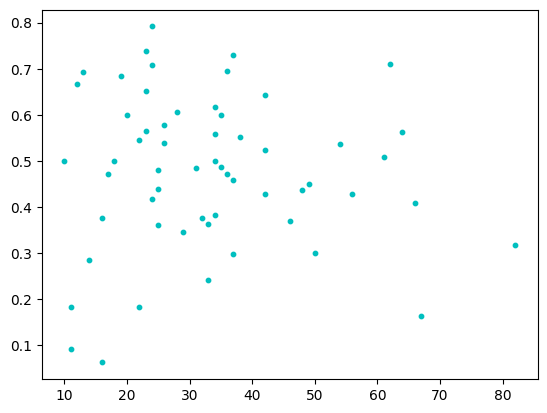

In [65]:
plt.scatter(prodi['Jumlah Prodi'], prodi['Presentase B'], s=10, c="c", marker = "o", alpha = 1)
plt.show()

In [48]:
x_arr = np.array(prodi_x)
scaler = MinMaxScaler()
prodi_scaled = scaler.fit_transform(x_arr)
prodi_scaled

array([[0.14439655, 0.38719212, 0.56849387, 0.        , 0.66666667],
       [0.08210784, 0.55966386, 0.47774003, 0.        , 0.66666667],
       [0.1675    , 0.408     , 0.53300912, 0.        , 0.66666667],
       [0.        , 0.86373626, 0.29553425, 0.        , 0.66666667],
       [0.08210784, 0.6       , 0.44484177, 0.        , 0.66666667],
       [0.06068841, 0.92795031, 0.19452887, 0.        , 0.66666667],
       [0.        , 0.51771429, 0.57775076, 0.        , 0.66666667],
       [0.21809896, 0.42857143, 0.47568389, 0.        , 0.66666667],
       [0.        , 1.        , 0.18439716, 0.        , 0.66666667],
       [0.19034091, 0.66233766, 0.3072672 , 0.        , 0.66666667],
       [0.18206522, 0.80869565, 0.19452887, 0.        , 0.66666667],
       [0.36732456, 0.85263158, 0.01023836, 0.        , 0.66666667],
       [0.11631944, 0.48571429, 0.5106383 , 0.        , 0.66666667],
       [0.17447917, 0.88571428, 0.13779129, 0.        , 0.66666667],
       [0.18206522, 0.68944099, 0.

In [49]:
from sklearn.decomposition import PCA
pca = PCA(2)

df = pca.fit_transform(prodi_scaled)
df.shape



(58, 2)

c:\Users\GLOBAL KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GLOBAL KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GLOBAL KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GLOBAL KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

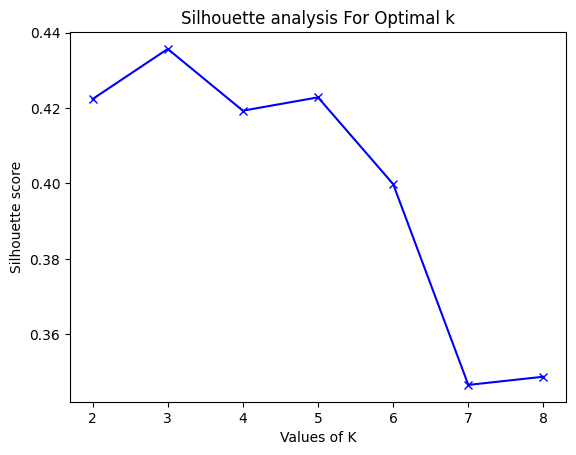

In [50]:

from sklearn.metrics import silhouette_samples,silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(prodi_scaled)

c:\Users\GLOBAL KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [58]:
print(kmeans.cluster_centers_)
prodi["cluster"] = kmeans.labels_
prodi.head()

[[1.72861760e-01 6.87752431e-01 3.00015017e-01 1.47058819e-02
  6.66666667e-01]
 [3.22692653e-02 2.93854809e-01 7.30864243e-01 1.00000000e-01
  3.00000000e-01]
 [6.35434642e-01 4.74335348e-01 1.03929750e-01 1.04083409e-17
  8.33333333e-01]]


,University,Presentase A,Presentase B,Presentase C,Perc. Tidak Akr,Akreditasi Kampus,Jumlah Prodi,Jumlah A,Jumlah B,Jumlah C,Tidak Terakreditasi,Poin,cluster
0,IAIN Ambon,0.103448,0.344828,0.551724,0.0,3,29,3,10,16,0,74,0
1,IAIN Bone,0.058824,0.470588,0.470588,0.0,3,17,1,8,8,0,44,0
2,IAIN Curup,0.120000,0.360000,0.520000,0.0,3,25,3,9,13,0,65,0
3,IAIN Fattahul Muluk Papua,0.000000,0.692308,0.307692,0.0,3,13,0,9,4,0,35,0
4,IAIN Kediri,0.058824,0.500000,0.441176,0.0,3,34,2,17,15,0,89,0


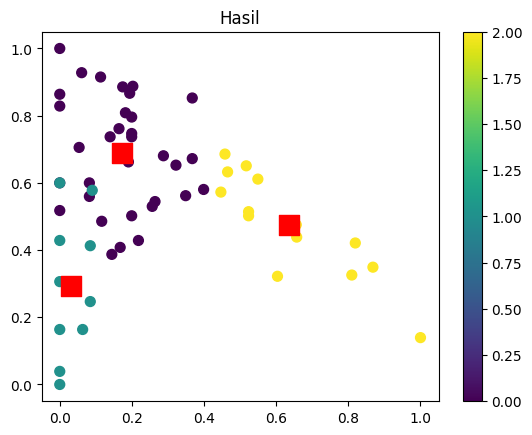

In [59]:
output = plt.scatter(prodi_scaled[:,0], prodi_scaled[:,1], s = 50, c = prodi.cluster, marker='o', alpha = 1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='s')
plt.title("Hasil")
plt.colorbar(output)
plt.show()

In [63]:
pd.set_option('display.max_rows', None)

prodi[["cluster","University"]]


,cluster,University
0,0,IAIN Ambon
1,0,IAIN Bone
2,0,IAIN Curup
3,0,IAIN Fattahul Muluk Papua
4,0,IAIN Kediri
5,0,IAIN Kendari
6,0,IAIN Kerinci
7,0,IAIN Kudus
8,0,IAIN Langsa
9,0,IAIN Lhokseumawe
